(Source: http://www.computervisionmodels.com/)
## Maximum likelihood

find set of parameters $\hat{\theta}$ under which the date $\{x_i\}_{i=1}^I$ are most likely.

To calculate likelihood function $ \ \Pr(x_i \ | \ \theta) \ $ at single data point $x_i$, simply evaluate pdf at $x_i$. Assuming each point is drawn independently from distribtion, likelihood function $\Pr(x_{1...I} | \theta)$ for a set of points is the product of the individual likelihoods. Hence, the ML estimate of the params is:

$$\hat{\theta} = \underset{\theta}{\mathrm{argmax}}[\Pr(x_{1...I} \ | \ \theta \ )] \\
= \underset{\theta}{\mathrm{argmax}} \biggr[
\prod_{i=1}^I \Pr(x_i | \theta)
\biggr]$$

**Evaluate**: $\Pr(x^* \ | \ \hat{\theta} \ )$

---
#### Example (univariate normal)

$$
\Pr(x \ | \ \mu, \sigma^2) = \mathrm{Norm}_x [\mu, \sigma^2] =
\frac{1}{\sqrt{2\pi \sigma^2}} exp \biggr[ 
-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}
\biggr]
$$

Likelihood of $\Pr(x_{1...I} | \mu, \sigma^2)$ of parameters $\{\mu, \sigma^2\}$ for observed data $\{x_i\}_{i=1}^I$ is computed by evaluating pdf for each data point separatly and taking the product:

$$
\Pr(x_{1...I} | \mu, \sigma^2) = \prod_{i=1}^I\Pr\big(x_i \ \big| \ \mu, \sigma^2\big)\\
= \prod_{i=1}^I \mathrm{Norm}\big[\mu, \sigma^2 \big]\\
= \frac{1}{(2\pi\sigma^2)^{\frac{I}{2}}} \mathrm{exp}\biggr[
-0.5 \sum_{i=1}^I \frac{(x_i - \mu)^2}{\sigma^2}
\biggr]
$$


xx



$$\hat{\mu}, \hat{\sigma}^2 = \underset{\mu, \sigma^2}{argmax}\biggr[
\sum_{i=1}^I \log\big[ 
\mathrm{Norm}_x [\mu, \sigma^2]
\big]
\biggr]$$


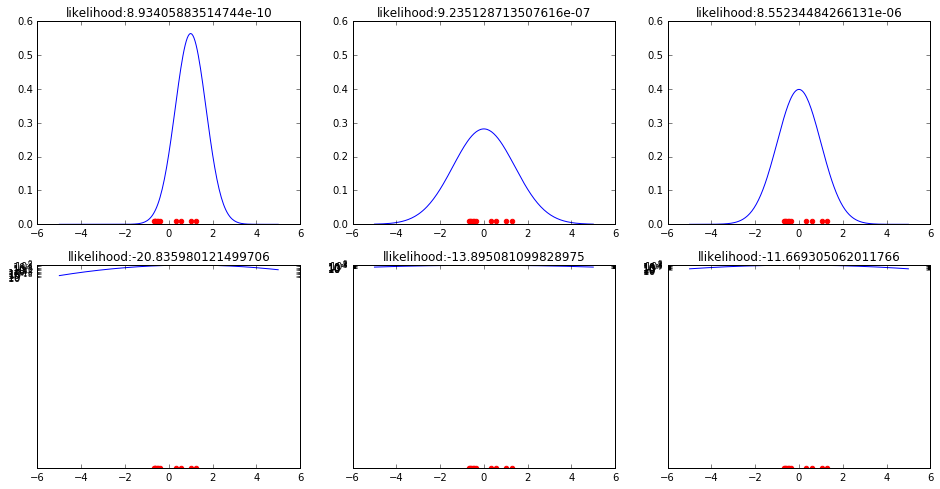

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def norm(mu, sigma_sq):
    first_term = 1.0 / math.sqrt(2.0 * math.pi * sigma_sq)
    return lambda x: first_term * \
        math.exp(-0.5 * (((x-mu)**2)/sigma_sq))

def likelihood(X, pr):
    total = 1
    for x in X:
        total = pr(x) * total
    return total
    
# ==== np draw ====

samples = np.random.normal(0.0, 1, 10)

fig = plt.figure(figsize=(16,8))

# ==== plot ====
ax = fig.add_subplot(231)
mu, sigma_sq = 1, 0.5
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ax.plot(np.array(X), np.array(Y))
ax.scatter(samples, [0.01] * len(samples), color='red')
ax.set_ylim([0, 0.6])

l = likelihood(samples, N)
ax.set_title("likelihood:" + str(l))

# ==
ay = fig.add_subplot(232)
mu, sigma_sq = 0, 2
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ay.plot(np.array(X), np.array(Y))
ay.scatter(samples, [0.01] * len(samples), color='red')
ay.set_ylim([0, 0.6])

l = likelihood(samples, N)
ay.set_title("likelihood:" + str(l))

# ==
az = fig.add_subplot(233)
mu, sigma_sq = 0, 1
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

az.plot(np.array(X), np.array(Y))
az.scatter(samples, [0.01] * len(samples), color='red')
az.set_ylim([0, 0.6])

l = likelihood(samples, N)
az.set_title("likelihood:" + str(l))

# ==============================
# log likelihood
# ==============================

def log_likelihood(X, pr):
    total = 0
    for x in X:
        total = total + math.log(pr(x))
    return total

# ==== plot ====
ax = fig.add_subplot(234)
mu, sigma_sq = 1, 0.5
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ax.plot(np.array(X), np.array(Y))
ax.scatter(samples, [0] * len(samples), color='red')
ax.set_ylim([0, 1])
ax.set_yscale("log", nonposy='clip')

l = log_likelihood(samples, N)
ax.set_title("llikelihood:" + str(l))

# ==
ay = fig.add_subplot(235)
mu, sigma_sq = 0, 2
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

ay.plot(np.array(X), np.array(Y))
ay.scatter(samples, [0] * len(samples), color='red')
ay.set_ylim([0, 1])
ay.set_yscale("log", nonposy='clip')

l = log_likelihood(samples, N)
ay.set_title("llikelihood:" + str(l))

# ==
az = fig.add_subplot(236)
mu, sigma_sq = 0, 1
N = norm(mu, sigma_sq)

X = np.linspace(-5, 5, 201)
Y = [N(x) for x in X]

az.plot(np.array(X), np.array(Y))
az.scatter(samples, [0] * len(samples), color='red')
az.set_ylim([0, 1])
az.set_yscale("log", nonposy='clip')

l = log_likelihood(samples, N)
az.set_title("llikelihood:" + str(l))


plt.show()